In [1]:
#Notebooks import

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Excel import as Data Frame

data=pd.read_excel(r'C:\Users\alexd\OneDrive\Escritorio\Heura\Data_promo_python_orig.xlsx')

data.head(15)

,Cliente,Codigo,Semana,Volumen
0,Carrefour,989,2,641.28
1,Carrefour,989,3,591.36
2,Carrefour,989,4,1393.92
3,Carrefour,989,5,1584.00
4,Carrefour,989,6,1478.40
5,Carrefour,989,7,1898.88
6,Carrefour,989,8,840.96
7,Carrefour,989,9,828.48
8,Carrefour,989,10,511.68
9,Carrefour,989,11,1436.16


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cliente  36 non-null     object 
 1   Codigo   36 non-null     int64  
 2   Semana   36 non-null     int64  
 3   Volumen  36 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [4]:
# Modificar los números de semanas por cada producto y cliente.

data['Nombre_Promo'] =np.where(data['Semana'] >= 33, 'No promo 4',
                        np.where(data['Semana'] >= 27, 'Promo 4',
                        np.where(data['Semana'] >= 25, 'No promo 3',
                        np.where(data['Semana'] >= 22, 'Promo 3',
                        np.where(data['Semana'] >= 15, 'No promo 2', 
                        np.where(data['Semana'] >= 12, 'Promo 2',
                        np.where(data['Semana'] >= 9, 'No promo 1',
                        np.where(data['Semana'] >= 4, 'Promo 1',
                        np.where(data['Semana'] >= 1, 'No promo 0', -1
                        )))))))))

In [5]:
data.head()

,Cliente,Codigo,Semana,Volumen,Nombre_Promo
0,Carrefour,989,2,641.28,No promo 0
1,Carrefour,989,3,591.36,No promo 0
2,Carrefour,989,4,1393.92,Promo 1
3,Carrefour,989,5,1584.00,Promo 1
4,Carrefour,989,6,1478.40,Promo 1


In [6]:
# Media volumen por cliente, codigo y tipo de promo. 

def promo_sales (Cliente, Codigo, Nombre_Promo):
    df=data.loc[data.Cliente==Cliente]\
                    .groupby([Codigo, Nombre_Promo])\
                    .mean().Volumen
    
    df=df.unstack().fillna(0)
    return df
promo_sales('Carrefour', 'Codigo', 'Nombre_Promo')

Nombre_Promo,No promo 0,No promo 1,No promo 2,No promo 3,No promo 4,Promo 1,Promo 2,Promo 3,Promo 4
Codigo,,,,,,,,,
989,616.32,925.44,909.12,2146.08,1195.776,1439.232,1152.0,1608.32,1019.2


In [7]:
# Rellenar solamente el nombre del cliente y ejecutar código.

df2=promo_sales('Carrefour', 'Codigo', 'Nombre_Promo')

In [8]:
df2['Promo_1']=((df2['Promo 1']-df2['No promo 0'])/df2['No promo 0'])
df2['Promo_2']=((df2['Promo 2']-df2['No promo 1'])/df2['No promo 1'])
df2['Promo_3']=((df2['Promo 3']-df2['No promo 2'])/df2['No promo 2'])
df2['Promo_4']=((df2['Promo 4']-df2['No promo 3'])/df2['No promo 3'])

df2['Promo_1'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df2['Promo_1']], index = df2.index)
df2['Promo_2'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df2['Promo_2']], index = df2.index)
df2['Promo_3'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df2['Promo_3']], index = df2.index)
df2['Promo_4'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df2['Promo_4']], index = df2.index)

In [9]:
# % inc/decr volumen medio durante las semanas de promo versus las semanas de no promo anteriores por Cliente y Producto.

df2[['Promo_1','Promo_2','Promo_3','Promo_4']]

Nombre_Promo,Promo_1,Promo_2,Promo_3,Promo_4
Codigo,,,,
989,133.52%,24.48%,76.91%,-52.51%


In [10]:
# Total volumen por cliente, codigo y tipo de promo. 

def promo_sales (Cliente, Codigo, Nombre_Promo):
    df=data.loc[data.Cliente==Cliente]\
                    .groupby([Codigo, Nombre_Promo])\
                    .sum().Volumen
    
    df=df.unstack().fillna(0)
    
    ax=(df).plot(kind='bar', figsize=(8, 5), grid=True)

    ax.set_ylabel('Total Volumen')
    
    ax.set_xlabel(Cliente);
    
    plt.show();
    
    return df
    

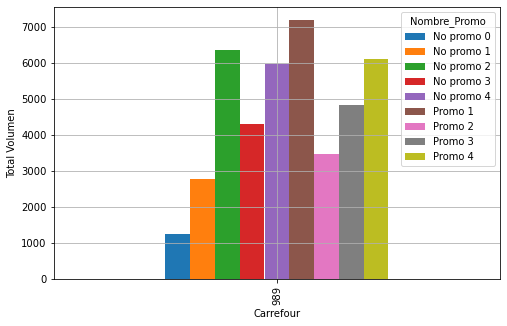

Nombre_Promo,No promo 0,No promo 1,No promo 2,No promo 3,No promo 4,Promo 1,Promo 2,Promo 3,Promo 4
Codigo,,,,,,,,,
989,1232.64,2776.32,6363.84,4292.16,5978.88,7196.16,3456.0,4824.96,6115.2


In [11]:
promo_sales('Carrefour', 'Codigo', 'Nombre_Promo')